In [6]:
#Final_Project_11613968
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [7]:
# For timeseries RNN LSTM neural networks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense

In [8]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler

In [9]:
df_ALL=pd.read_csv('D202.csv')

In [10]:
df_ALL.head()

,TYPE,DATE,START TIME,END TIME,USAGE,UNITS,COST,NOTES
0,Electric usage,10/22/2016,0:00,0:14,0.01,kWh,$0.00,NaN
1,Electric usage,10/22/2016,0:15,0:29,0.01,kWh,$0.00,NaN
2,Electric usage,10/22/2016,0:30,0:44,0.01,kWh,$0.00,NaN
3,Electric usage,10/22/2016,0:45,0:59,0.01,kWh,$0.00,NaN
4,Electric usage,10/22/2016,1:00,1:14,0.01,kWh,$0.00,NaN


In [11]:
df_ALL.shape

(70368, 8)

In [12]:
df_ALL.dtypes

TYPE           object
DATE           object
START TIME     object
END TIME       object
USAGE         float64
UNITS          object
COST           object
NOTES         float64
dtype: object

In [13]:
# Statistics Sumary
df_ALL.describe()

,USAGE,NOTES
count,70368.000000,0.0
mean,0.121941,NaN
std,0.210507,NaN
min,0.000000,NaN
25%,0.030000,NaN
50%,0.050000,NaN
75%,0.120000,NaN
max,2.360000,NaN


In [14]:
df = df_ALL.iloc[:,4:5]

In [15]:
df.head()

,USAGE
0,0.01
1,0.01
2,0.01
3,0.01
4,0.01


<Axes: >

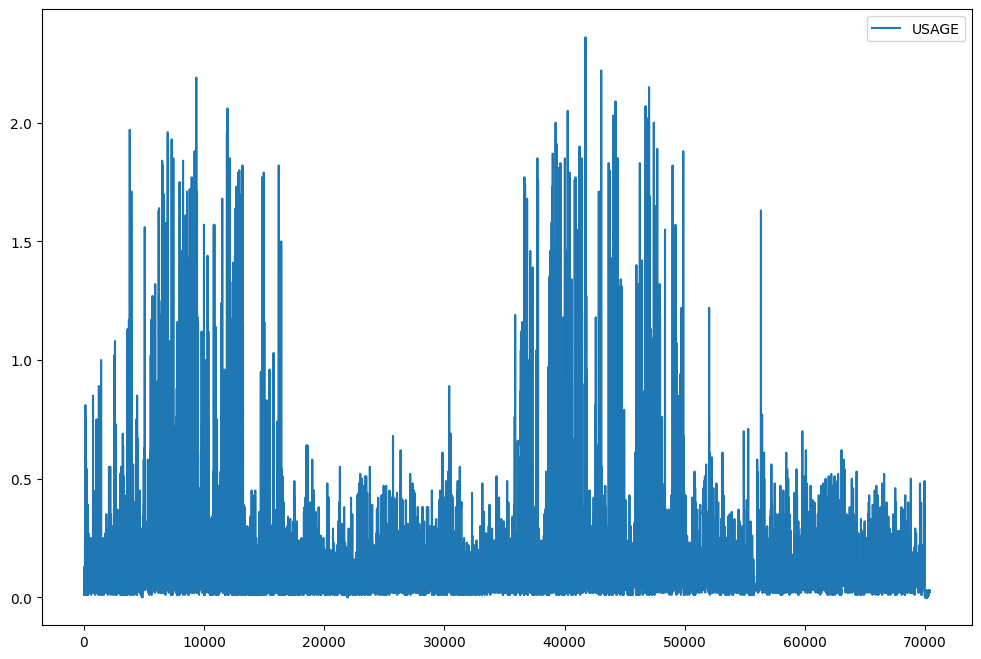

In [16]:
df.plot(figsize=(12, 8))

In [17]:
length60 = 60

In [18]:
length60

60

In [19]:
len(df)

70368

In [20]:
test_precent = 0.1

In [21]:
len(df)*test_precent

7036.8

In [22]:
test_length = np.round(len(df)*test_precent)
test_length

7037.0

In [23]:
split_index = int(len(df) - test_length)
split_index

63331

In [24]:
data_train = df.iloc[: split_index]
data_test = df.iloc[split_index - length60 :]

In [25]:
data_train.head(5)

,USAGE
0,0.01
1,0.01
2,0.01
3,0.01
4,0.01


In [26]:
data_train.tail()

,USAGE
63326,0.16
63327,0.16
63328,0.09
63329,0.09
63330,0.09


In [27]:
data_test.head(5)

,USAGE
63271,0.05
63272,0.05
63273,0.05
63274,0.05
63275,0.05


In [28]:
data_test.tail()

,USAGE
70363,0.02
70364,0.03
70365,0.03
70366,0.03
70367,0.03


In [29]:
scaler = MinMaxScaler()

In [30]:
scaler.fit(data_train)

MinMaxScaler()

In [31]:
normalized_train = scaler.transform(data_train)
normalized_test = scaler.transform(data_test)

In [32]:
batch_size32 = 32
train_tsGenerator60 = TimeseriesGenerator(normalized_train, normalized_train, length=length60, batch_size=batch_size32)

In [33]:
len(normalized_train)

63331

In [34]:
len(train_tsGenerator60)

1978

In [35]:
x,y = train_tsGenerator60[0]

In [36]:
# print(x)

In [37]:
# print(y)

In [38]:
n_features = 1

In [39]:
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(length60, n_features)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, activation='relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50, activation='relu'))
model.add(Dense(1))

In [40]:
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 

Train (Fit) Model Using fit_generator()

In [42]:
model.fit_generator(train_tsGenerator60, epochs=100)

Epoch 1/3
   1/1978 [..............................] - ETA: 2:34 - loss: 4.2495e-04

C:\Users\KONGA\AppData\Local\Temp\ipykernel_16840\3984196635.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_tsGenerator60, epochs=3)


1978/1978 [==============================] - 83s 42ms/step - loss: 0.0023
Epoch 2/3
1978/1978 [==============================] - 84s 43ms/step - loss: 0.0022
Epoch 3/3
1978/1978 [==============================] - 84s 42ms/step - loss: 0.0020


### Visualize Model's Performance after Training

In [43]:
loss_history_keys = model.history.history.keys()
loss_history_keys

dict_keys(['loss'])

<Axes: >

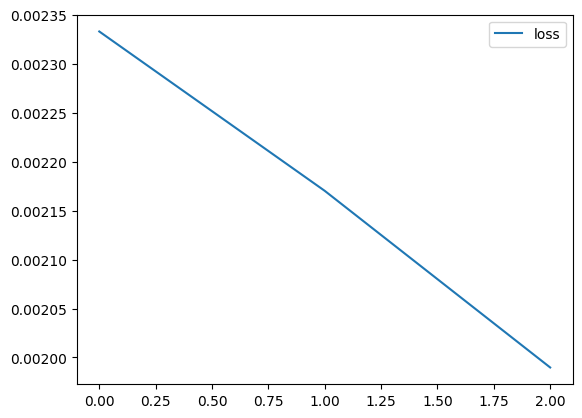

In [44]:
df_model_loss = pd.DataFrame(model.history.history)
df_model_loss.plot()

In [45]:
batch_size1 = 1
test_tsGenerator60 = TimeseriesGenerator(normalized_test, normalized_test, length=length60, batch_size=batch_size1)

In [46]:
normalized_prediction = model.predict_generator (test_tsGenerator60) 

C:\Users\KONGA\AppData\Local\Temp\ipykernel_16840\880395577.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  normalized_prediction = model.predict_generator (test_tsGenerator60)


In [47]:
normalized_prediction

array([[0.02767591],
       [0.03083866],
       [0.02144145],
       ...,
       [0.01177924],
       [0.0123075 ],
       [0.01240895]], dtype=float32)

In [ ]:
len(normalized_prediction)

138

In [48]:
# convert normalized predictions back to the true values
prediction = scaler.inverse_transform(normalized_prediction)

In [51]:
prediction_index = np.arange(1244, 1382, step=1)

df_prediction = pd.DataFrame(data=prediction, index=prediction_index, columns=['Prediction'])

ValueError: Shape of passed values is (7037, 1), indices imply (1, 1)

In [50]:
df_prediction

NameError: name 'df_prediction' is not defined

### Visualize Prediction

<AxesSubplot:>

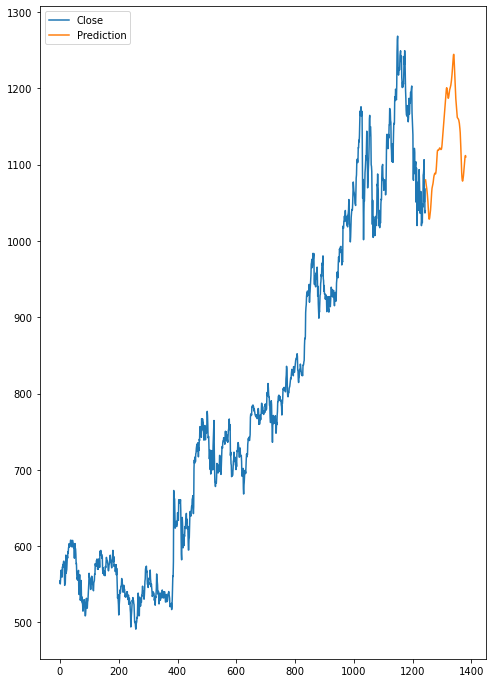

In [ ]:
ax = data_train.plot()
df_prediction.plot(ax=ax, figsize=(8, 12))

### Visualize Prediction and compare actual close price

<AxesSubplot:>

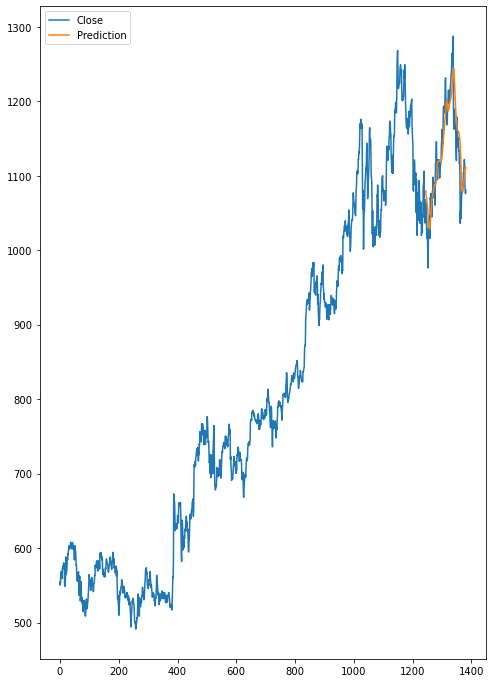

In [ ]:
ax = df.plot()
df_prediction.plot(ax=ax, figsize=(8, 12))

# PreProcess Full Input Dataset

In [ ]:
#Still use Minmax Scaler to normalize the full input dataset

full_scaler = MinMaxScaler()
normalized_full_data = full_scaler.fit_transform(df)

# Create TimeSeriesGenerator for Forecasting

In [ ]:
# Number of time steps of the input time series
# still use length60:
length60

60

In [ ]:
# create timeseries Generator for forecasting
forecast_tsGenerator = TimeseriesGenerator(normalized_full_data, normalized_full_data, length=length60, batch_size=batch_size32)


# Build, Compile, and Fit LSTM model for Forecasting

In [ ]:
# Train/Fit LSTM model
# In forecasting, we don't validate, only FORECAST
# So, not need EarlyStop: Not need validation_generator

model.fit_generator(forecast_tsGenerator, epochs = 40)

Epoch 1/40
42/42 [==============================] - 17s 396ms/step - loss: 0.0023
Epoch 2/40
42/42 [==============================] - 17s 395ms/step - loss: 0.0017
Epoch 3/40
42/42 [==============================] - 17s 394ms/step - loss: 0.0022
Epoch 4/40
42/42 [==============================] - 17s 410ms/step - loss: 0.0015
Epoch 5/40
42/42 [==============================] - 17s 395ms/step - loss: 0.0014
Epoch 6/40
42/42 [==============================] - 16s 387ms/step - loss: 0.0014
Epoch 7/40
42/42 [==============================] - 17s 397ms/step - loss: 0.0016
Epoch 8/40
42/42 [==============================] - 17s 395ms/step - loss: 0.0013
Epoch 9/40
42/42 [==============================] - 17s 395ms/step - loss: 0.0014
Epoch 10/40
42/42 [==============================] - 17s 397ms/step - loss: 0.0018
Epoch 11/40
42/42 [==============================] - 16s 389ms/step - loss: 0.0017
Epoch 12/40
42/42 [==============================] - 17s 398ms/step - loss: 0.0015
Epoch 13/40
4

# Time Series Forecasting Using LSTM Neural Network: 07/01/2019 - 12/15/2019

In [ ]:
forecast = []
# Set periods with the time span of forecasting
# Let's forecast for the next 117 business days (07/01/2019 - 12/15/2019)
periods = 117

first_eval_batch = normalized_full_data[-length60:]
current_batch = first_eval_batch.reshape((1, length60, n_features))

for i in range(periods):
    
    # get prediction 1 time stamp ahead([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    forecast.append(current_pred)
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:], [[current_pred]],axis=1)
    


# Inverse to Transform Normalized Data Back into True Values

In [ ]:
forecast = full_scaler.inverse_transform(forecast)

forecast

array([[1064.10696734],
       [1059.01504253],
       [1054.19582058],
       [1049.81553393],
       [1045.91690365],
       [1042.45137013],
       [1039.32466219],
       [1036.43263536],
       [1033.68320197],
       [1031.00667922],
       [1028.35702327],
       [1025.70974072],
       [1023.05638228],
       [1020.39974856],
       [1017.74862112],
       [1015.11429729],
       [1012.5078371 ],
       [1009.93854424],
       [1007.41330156],
       [1004.93623875],
       [1002.50849505],
       [1000.12741226],
       [ 997.79018977],
       [ 995.49388458],
       [ 993.23602835],
       [ 991.01405782],
       [ 988.82559961],
       [ 986.66847018],
       [ 984.54072335],
       [ 982.4407927 ],
       [ 980.36692189],
       [ 978.31792425],
       [ 976.2925656 ],
       [ 974.28956431],
       [ 972.3080185 ],
       [ 970.37066526],
       [ 968.47062176],
       [ 966.5985843 ],
       [ 964.7503757 ],
       [ 962.92352764],
       [ 961.1158566 ],
       [ 959.324

In [ ]:
df

,Close
0,554.481689
1,550.436829
2,556.573853
3,567.303589
4,568.484192
...,...
1377,1115.520020
1378,1086.349976
1379,1079.800049
1380,1076.010010


# Creating new time stamp index with pandas : 07/01/2019 - 12/15/2019

In [ ]:
#calculate forecast index

forecast_index = np.arange(1382,1499,step=1)

In [ ]:
forecast_df=pd.DataFrame(data=forecast,index=forecast_index,columns=['Forecast'])

In [ ]:
forecast_df

,Forecast
1382,1064.106967
1383,1059.015043
1384,1054.195821
1385,1049.815534
1386,1045.916904
...,...
1494,829.812185
1495,827.357598
1496,824.867410
1497,822.340554


<AxesSubplot:>

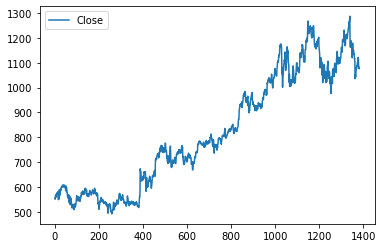

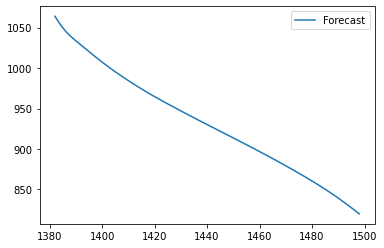

In [ ]:
df.plot()
forecast_df.plot()

<AxesSubplot:>

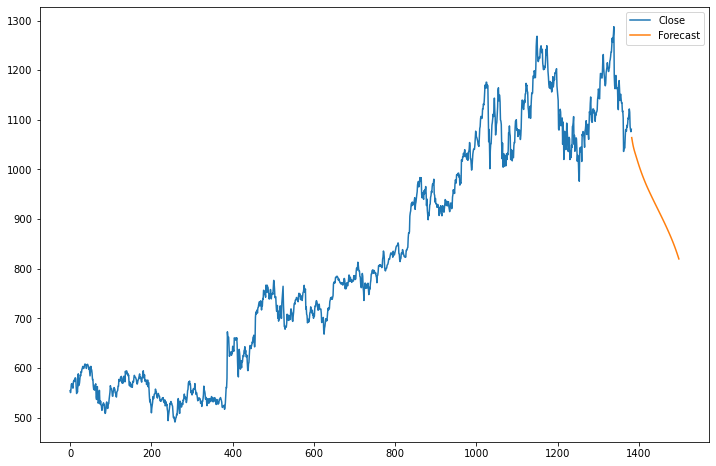

In [ ]:
ax=df.plot()
forecast_df.plot(ax=ax, figsize=(12,8))

In [ ]:
df_ALL_JUL_DEC_2019 = pd.read_csv('DATA/GOOG_20190701_20191215.csv')

In [ ]:
df_ALL_JUL_DEC_2019.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-07-01,1098.000000,1107.579956,1093.703003,1097.949951,1097.949951,1436300
1,2019-07-02,1102.239990,1111.770020,1098.170044,1111.250000,1111.250000,991600
2,2019-07-03,1117.410034,1126.760010,1113.859985,1121.579956,1121.579956,767000
3,2019-07-05,1117.800049,1132.880005,1116.140015,1131.589966,1131.589966,1264300
4,2019-07-08,1125.170044,1125.979980,1111.209961,1116.349976,1116.349976,1236400


In [ ]:
df_JUL_DEC_2019=df_ALL_JUL_DEC_2019.iloc[:,4:5]

In [ ]:
df_JUL_DEC_2019

,Close
0,1097.949951
1,1111.250000
2,1121.579956
3,1131.589966
4,1116.349976
...,...
112,1343.560059
113,1344.660034
114,1345.020020
115,1350.270020


<AxesSubplot:>

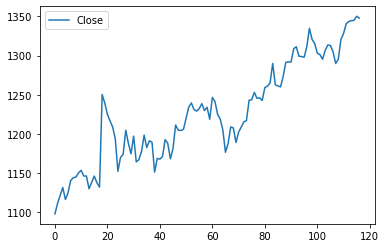

In [ ]:
df_JUL_DEC_2019.plot()

In [ ]:
forecast_df['Forecast'].values

array([1064.10696734, 1059.01504253, 1054.19582058, 1049.81553393,
       1045.91690365, 1042.45137013, 1039.32466219, 1036.43263536,
       1033.68320197, 1031.00667922, 1028.35702327, 1025.70974072,
       1023.05638228, 1020.39974856, 1017.74862112, 1015.11429729,
       1012.5078371 , 1009.93854424, 1007.41330156, 1004.93623875,
       1002.50849505, 1000.12741226,  997.79018977,  995.49388458,
        993.23602835,  991.01405782,  988.82559961,  986.66847018,
        984.54072335,  982.4407927 ,  980.36692189,  978.31792425,
        976.2925656 ,  974.28956431,  972.3080185 ,  970.37066526,
        968.47062176,  966.5985843 ,  964.7503757 ,  962.92352764,
        961.1158566 ,  959.32494171,  957.54859945,  955.78483618,
        954.03189558,  952.28849602,  950.55278625,  948.82386439,
        947.10168296,  945.38628943,  943.67754141,  941.97539142,
        940.27974452,  938.59026845,  936.90667839,  935.22864208,
        933.55568482,  931.88723701,  930.2227765 ,  928.56159

In [ ]:
df_JUL_DEC_2019['Forecast'] = forecast_df['Forecast'].values

In [ ]:
df_JUL_DEC_2019

,Close,Forecast
0,1097.949951,1064.106967
1,1111.250000,1059.015043
2,1121.579956,1054.195821
3,1131.589966,1049.815534
4,1116.349976,1045.916904
...,...,...
112,1343.560059,829.812185
113,1344.660034,827.357598
114,1345.020020,824.867410
115,1350.270020,822.340554


<AxesSubplot:>

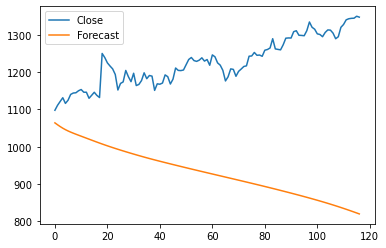

In [ ]:
df_JUL_DEC_2019.plot()